In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sea 

In [2]:
dataset = pd.read_csv('/home/ubuntu-wasim/Documents/machineLearningMatrial/Social_Network_Ads.csv')
dataset.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:>

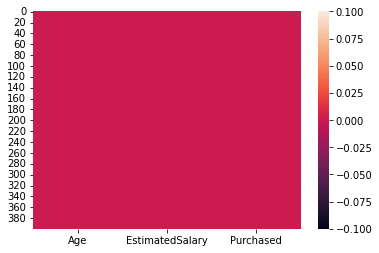

In [5]:
sea.heatmap(dataset.isnull())

In [6]:
dataset.keys()

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

<AxesSubplot:xlabel='Purchased', ylabel='count'>

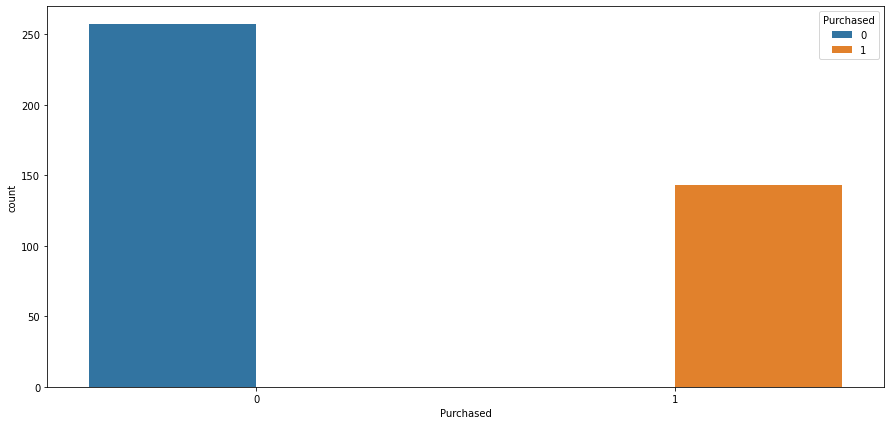

In [7]:
plt.figure(figsize=(15,7))
sea.countplot(x="Purchased" ,hue='Purchased', data=dataset)

In [8]:
#x=dataset.drop('EstimatedSalary' ,axis=1)
#y = dataset.drop('Age', axis=1)

In [9]:
#plt.figure(figsize=(15,8))
#plt.scatter(x,y)

#plt.show

<AxesSubplot:ylabel='Frequency'>

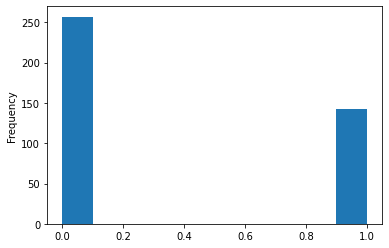

In [10]:
dataset['Purchased'].plot.hist()

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

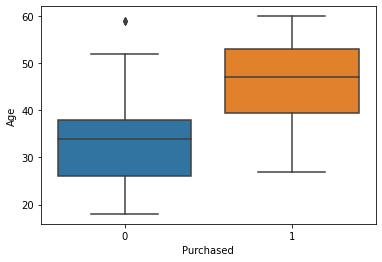

In [11]:
sea.boxplot(x='Purchased' , y='Age' , data=dataset)

In [12]:
dataset.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [13]:
X=dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X , y , test_size=.20, random_state=1)


In [15]:
print(X_train.shape)
print(y_train.shape)
#X_test

(320, 2)
(320,)


## feature Scalling

In [16]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [17]:
#X_test

##  training the logistic Regrerssion Model on training dataset

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

## predicting new Result

In [19]:
print(classifier.predict(std.transform([[44,8700]])))

[0]


## predicting the Test Set Result

In [20]:
y_pred = classifier.predict(X_test)
#np.set_printoptions(precision=2)
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0,

In [21]:
#y_pred.reshape(len(y_pred),1)


In [22]:
y_test.reshape((len(y_test),1))
y_test.ndim


1

## making the Confiusion Matrix

In [23]:
import scikitplot.metrics as splt
splt.plot_confusion_matrix(y_test,y_pred,figsize=(7,7))
plt.show()

ModuleNotFoundError: No module named 'scikitplot'

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm=confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[41  7]
 [ 6 26]]


0.8375

## Visualising the training set Result

In [27]:
from matplotlib.colors import ListedColormap
X_set , y_set = std.inverse_transform(X_train),y_train
X1 , X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-10,stop=X_set[:,0].max()+10 , step=0.25),
                     np.arange(start=X_set[:,1].min()-1000,stop=X_set[:,1].max()+1000,step=0.25 ))

plt.contourf(X1,X2,classifier.predict(std.transform(np.array(X1.ravel(),X2.ravel()  ))) )

AttributeError: module 'matplotlib.pyplot' has no attribute 'countourf'

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = std.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

In [44]:
x = np.linspace(-5, 5, 101)
y = np.linspace(-5, 5, 101)
# full coorindate arrays
xx, yy = np.meshgrid(x, y)
x

array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
       -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
       -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8,
       -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7,
       -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9,  5. ])

In [34]:
zz = xx**2 + 4 *yy**2

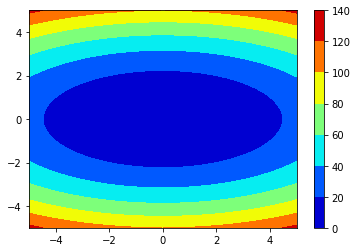

In [35]:
plt.contourf(xx,yy,zz,cmap='jet')
plt.colorbar()
plt.show()

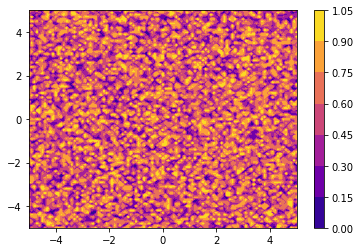

In [46]:
random_data= np.random.random((101,101))
plt.contourf(xx , yy , random_data , cmap='plasma')
plt.colorbar()
plt.show()